In [4]:
!pip install wordcloud

distributed 1.21.8 requires msgpack, which is not installed.
grin 1.2.1 requires argparse>=1.1, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


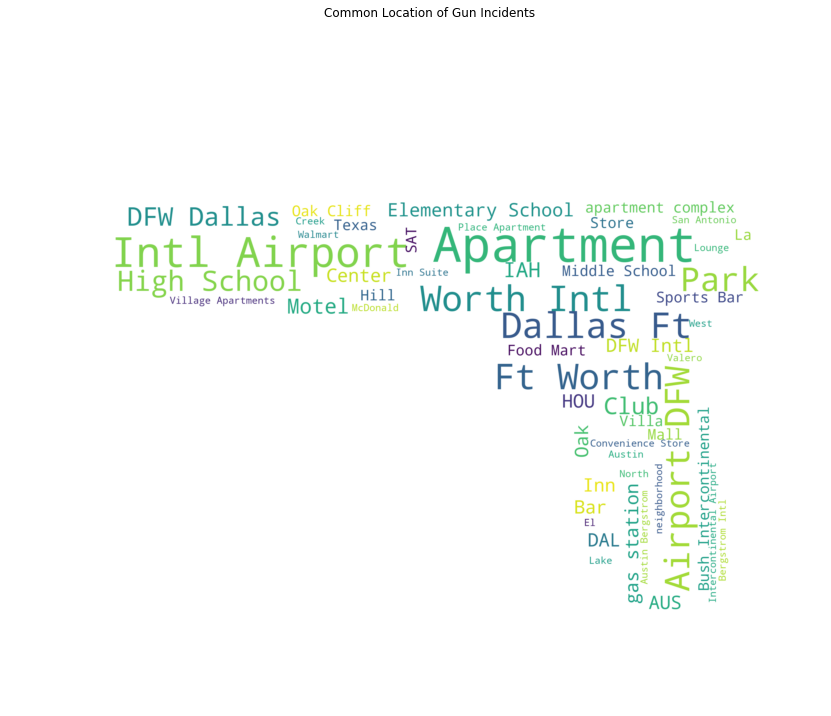

In [9]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df_gun_crimes=pd.read_csv('gun_cleaned1.csv')

from PIL import Image
from wordcloud import WordCloud # wordcloud needs to be installed in your machine
pd.options.mode.chained_assignment = None

cl = df_gun_crimes[df_gun_crimes["location_description"].notnull()]
cl["location_description"] = cl["location_description"].str.replace("International","Intl")
cl["location_description"] = cl["location_description"].str.replace("Int'l","Intl")
c_location = cl["location_description"].str.cat(sep=" ")

gun_mask = np.array(Image.open( "Gun_outline.jpg"))
w = WordCloud(background_color="white", scale=5, max_words=2000, collocations=True,
              max_font_size=40, min_font_size=8, mask=gun_mask).generate(c_location) 
# collocations=False => gets rid of words that are frequently grouped together in text
plt.figure(figsize=(14,14))
plt.imshow(w,interpolation="bilinear")
plt.axis("off")
plt.plot()
plt.title("Common Location of Gun Incidents")
plt.savefig('Crime_Location_WordCloud.png')

